In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("final_cleaned.csv")

In [3]:
df.count()

Item_Identifier              8322
Item_Weight                  8322
Item_Fat_Content             8322
Item_Visibility              8322
Item_Type                    8322
Item_MRP                     8322
Outlet_Identifier            8322
Outlet_Establishment_Year    8322
Outlet_Size                  8322
Outlet_Location_Type         8322
Outlet_Type                  8322
Item_Outlet_Sales            8322
dtype: int64

In [4]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Cleaning up columns

#### Cleaning up the Item_Fat_Content column

In [5]:
l = len(df["Item_Fat_Content"])
for i in range(l):
    if df["Item_Fat_Content"][i] == "LF" or df["Item_Fat_Content"][i] == "low fat" or df["Item_Fat_Content"][i] == "Low Fat":
        df["Item_Fat_Content"][i] = df["Item_Fat_Content"][i].replace(df["Item_Fat_Content"][i], "L")
    elif df["Item_Fat_Content"][i] == "reg" or df["Item_Fat_Content"][i] == "Regular":
        df["Item_Fat_Content"][i] = df["Item_Fat_Content"][i].replace(df["Item_Fat_Content"][i], "R")

<ipython-input-5-333a97c919b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"][i] = df["Item_Fat_Content"][i].replace(df["Item_Fat_Content"][i], "R")
<ipython-input-5-333a97c919b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"][i] = df["Item_Fat_Content"][i].replace(df["Item_Fat_Content"][i], "L")


In [6]:
df["Item_Fat_Content"].value_counts()

L    5395
R    2927
Name: Item_Fat_Content, dtype: int64

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,20.25,R,0.171939,Canned,92.5120,OUT010,1998,Small,Tier 3,Grocery Store,186.4240
1,FDS52,8.89,L,0.009163,Frozen Foods,101.7016,OUT010,1998,Small,Tier 3,Grocery Store,101.2016
2,NCN07,18.50,L,0.056816,Others,132.1284,OUT010,1998,Small,Tier 3,Grocery Store,263.6568
3,FDI32,17.70,L,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Small,Tier 3,Grocery Store,345.5502
4,FDR47,17.85,L,0.070088,Breads,196.5794,OUT010,1998,Small,Tier 3,Grocery Store,585.2382


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,20.250,R,0.171939,Canned,92.5120,OUT010,1998,Small,Tier 3,Grocery Store,186.4240
1,FDS52,8.890,L,0.009163,Frozen Foods,101.7016,OUT010,1998,Small,Tier 3,Grocery Store,101.2016
2,NCN07,18.500,L,0.056816,Others,132.1284,OUT010,1998,Small,Tier 3,Grocery Store,263.6568
3,FDI32,17.700,L,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Small,Tier 3,Grocery Store,345.5502
4,FDR47,17.850,L,0.070088,Breads,196.5794,OUT010,1998,Small,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDT57,15.200,L,0.018943,Snack Foods,236.0248,OUT027,1985,Medium,Tier 3,Supermarket Type3,6636.6944
8318,FDW02,4.805,R,0.037517,Dairy,124.3704,OUT027,1985,Medium,Tier 3,Supermarket Type3,3004.0896
8319,NCO02,11.150,L,0.073013,Others,67.5142,OUT027,1985,Medium,Tier 3,Supermarket Type3,2306.9970
8320,FDJ15,11.350,R,0.023210,Dairy,183.3608,OUT027,1985,Medium,Tier 3,Supermarket Type3,6064.1064


### Normalizing stuff

In [10]:
df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.250,0.171939,92.5120,1998
1,8.890,0.009163,101.7016,1998
2,18.500,0.056816,132.1284,1998
3,17.700,0.291865,115.1834,1998
4,17.850,0.070088,196.5794,1998
...,...,...,...,...
8317,15.200,0.018943,236.0248,1985
8318,4.805,0.037517,124.3704,1985
8319,11.150,0.073013,67.5142,1985
8320,11.350,0.023210,183.3608,1985


In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0, 1))

In [12]:
Item_MRP = min_max.fit_transform(np.array(df['Item_MRP']).reshape(-1,1)).flatten()
Item_MRP = pd.Series(Item_MRP)
Item_MRP

0       0.259857
1       0.298863
2       0.428010
3       0.356086
4       0.701573
          ...   
8317    0.868999
8318    0.395081
8319    0.153754
8320    0.645466
8321    0.289536
Length: 8322, dtype: float64

In [13]:
Item_Weight = min_max.fit_transform(np.array(df['Item_Weight']).reshape(-1,1)).flatten()
Item_Weight = pd.Series(Item_Weight)
Item_Weight

0       0.934504
1       0.258113
2       0.830307
3       0.782673
4       0.791605
          ...   
8317    0.633820
8318    0.014885
8319    0.392676
8320    0.404585
8321    0.228639
Length: 8322, dtype: float64

In [14]:
Outlet_Establishment_Year = min_max.fit_transform(np.array(df['Outlet_Establishment_Year']).reshape(-1,1)).flatten()
Outlet_Establishment_Year = pd.Series(Outlet_Establishment_Year)
Outlet_Establishment_Year

0       0.541667
1       0.541667
2       0.541667
3       0.541667
4       0.541667
          ...   
8317    0.000000
8318    0.000000
8319    0.000000
8320    0.000000
8321    0.000000
Length: 8322, dtype: float64

In [15]:
df['Item_MRP'] = Item_MRP
df['Item_Weight'] = Item_Weight
df['Outlet_Establishment_Year'] = Outlet_Establishment_Year

In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,0.934504,R,0.171939,Canned,0.259857,OUT010,0.541667,Small,Tier 3,Grocery Store,186.4240
1,FDS52,0.258113,L,0.009163,Frozen Foods,0.298863,OUT010,0.541667,Small,Tier 3,Grocery Store,101.2016
2,NCN07,0.830307,L,0.056816,Others,0.428010,OUT010,0.541667,Small,Tier 3,Grocery Store,263.6568
3,FDI32,0.782673,L,0.291865,Fruits and Vegetables,0.356086,OUT010,0.541667,Small,Tier 3,Grocery Store,345.5502
4,FDR47,0.791605,L,0.070088,Breads,0.701573,OUT010,0.541667,Small,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDT57,0.633820,L,0.018943,Snack Foods,0.868999,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,6636.6944
8318,FDW02,0.014885,R,0.037517,Dairy,0.395081,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,3004.0896
8319,NCO02,0.392676,L,0.073013,Others,0.153754,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,2306.9970
8320,FDJ15,0.404585,R,0.023210,Dairy,0.645466,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,6064.1064


In [17]:
Item_Fat_Content = pd.get_dummies(df['Item_Fat_Content']).drop('R', axis = 1)['L']
Item_Fat_Content

0       0
1       1
2       1
3       1
4       1
       ..
8317    1
8318    0
8319    1
8320    0
8321    1
Name: L, Length: 8322, dtype: uint8

In [18]:
df['Item_Fat_Content'] = Item_Fat_Content

In [19]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,0.934504,0,0.171939,Canned,0.259857,OUT010,0.541667,Small,Tier 3,Grocery Store,186.4240
1,FDS52,0.258113,1,0.009163,Frozen Foods,0.298863,OUT010,0.541667,Small,Tier 3,Grocery Store,101.2016
2,NCN07,0.830307,1,0.056816,Others,0.428010,OUT010,0.541667,Small,Tier 3,Grocery Store,263.6568
3,FDI32,0.782673,1,0.291865,Fruits and Vegetables,0.356086,OUT010,0.541667,Small,Tier 3,Grocery Store,345.5502
4,FDR47,0.791605,1,0.070088,Breads,0.701573,OUT010,0.541667,Small,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDT57,0.633820,1,0.018943,Snack Foods,0.868999,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,6636.6944
8318,FDW02,0.014885,0,0.037517,Dairy,0.395081,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,3004.0896
8319,NCO02,0.392676,1,0.073013,Others,0.153754,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,2306.9970
8320,FDJ15,0.404585,0,0.023210,Dairy,0.645466,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,6064.1064


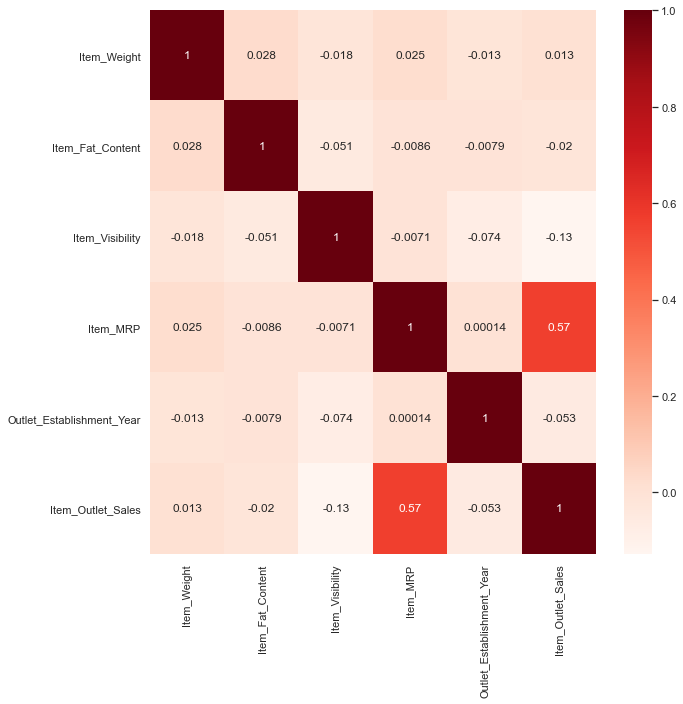

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(cor['Item_Outlet_Sales'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

Item_MRP             0.566667
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [22]:
df['Outlet_Size'].value_counts()

Small     4706
Medium    2710
High       906
Name: Outlet_Size, dtype: int64

In [23]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1208
Snack Foods              1161
Household                 891
Frozen Foods              836
Dairy                     660
Canned                    637
Baking Goods              632
Health and Hygiene        508
Soft Drinks               439
Meat                      414
Breads                    246
Hard Drinks               210
Others                    168
Starchy Foods             141
Breakfast                 107
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
pd.get_dummies(df['Outlet_Size'])

,High,Medium,Small
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8317,0,1,0
8318,0,1,0
8319,0,1,0
8320,0,1,0


In [25]:
df = df.join(pd.get_dummies(df['Outlet_Size'])).drop('Outlet_Size', axis = 1)

In [26]:
df = df.join(pd.get_dummies(df['Outlet_Location_Type'])).drop('Outlet_Location_Type', axis = 1)

In [27]:
df = df.join(pd.get_dummies(df['Outlet_Type'])).drop('Outlet_Type', axis = 1)

In [28]:
df = df.join(pd.get_dummies(df['Outlet_Identifier'])).drop('Outlet_Identifier', axis = 1)

In [29]:
df = df.join(pd.get_dummies(df['Item_Type'])).drop('Item_Type', axis = 1)

In [30]:
df = df.join(pd.get_dummies(df['Item_Identifier'])).drop('Item_Identifier', axis = 1)

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

KeyboardInterrupt: 

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Item_Outlet_Sales'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features